In [1]:
##load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
##Load Dataset From CSV File

In [7]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-12 08:09:42--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-05-12 08:09:42 (15.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [9]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [10]:
df.shape

(346, 10)

In [11]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [12]:
##Data visualization and pre-processing

In [13]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

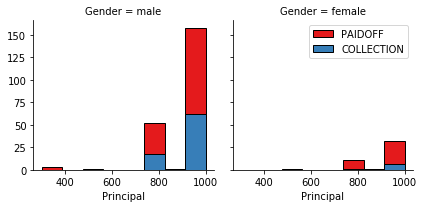

In [14]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 9)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

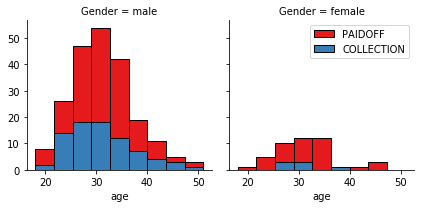

In [15]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

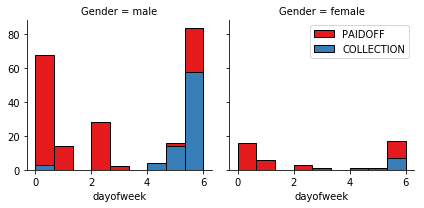

In [16]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [17]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [18]:
## Converting Categorical features to numerical values

In [19]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [20]:
##Lets convert male to 0 and female to 1

In [21]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [22]:
# One Hot Encoding - Educatiom

In [23]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [24]:
## Feature befor One Hot Encoding

In [25]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [26]:
## Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [27]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [28]:
X = Feature
X[0:9]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
5,1000,30,36,0,1,0,0,1
6,1000,30,28,0,1,0,0,1
7,800,15,26,0,1,0,0,1
8,300,7,29,0,1,0,0,1


In [29]:
y = df['loan_status'].values
y[0:8]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [30]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [31]:
## K Nearest Neighbor(KNN)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
X_train

array([[ 0.51578458, -0.95911111,  0.67333883, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.01006414, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.15575453, ..., -0.38170062,
         1.13639374, -0.86968108]])

In [34]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc #print accuracy array for eack k

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [39]:
seed=50
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=seed)

In [40]:
score=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.6906474820143885
2 :  0.5827338129496403
3 :  0.7266187050359713
4 :  0.6762589928057554
5 :  0.7482014388489209
6 :  0.6762589928057554
7 :  0.7482014388489209
8 :  0.7050359712230215
9 :  0.7769784172661871
10 :  0.7338129496402878
11 :  0.7482014388489209
12 :  0.7194244604316546
13 :  0.7482014388489209
14 :  0.7266187050359713
15 :  0.7410071942446043
16 :  0.7338129496402878
17 :  0.7482014388489209
18 :  0.7266187050359713
19 :  0.7553956834532374
20 :  0.7266187050359713
21 :  0.762589928057554
22 :  0.7194244604316546
23 :  0.762589928057554
24 :  0.7482014388489209
25 :  0.762589928057554
26 :  0.762589928057554
27 :  0.762589928057554
28 :  0.762589928057554
29 :  0.762589928057554
30 :  0.762589928057554
31 :  0.7913669064748201
32 :  0.7769784172661871
33 :  0.7913669064748201
34 :  0.7913669064748201
35 :  0.7913669064748201
36 :  0.7985611510791367
37 :  0.7841726618705036
38 :  0.7913669064748201
39 :  0.7913669064748201
40 :  0.7841726618705036
41 :  0.834532374

In [41]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')

41  :  83.45 %


Text(0, 0.5, 'Train Accuracy')

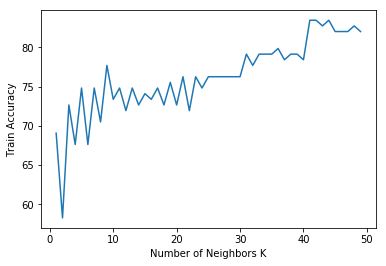

In [42]:
plt.plot(range(1,50),score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')

In [43]:
knn=KNeighborsClassifier(n_neighbors=41,weights='uniform')
knn.fit(X_train,y_train)
predKNN=knn.predict(X_test)
accuracy=metrics.accuracy_score(predKNN,y_test)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  83.5 %


In [44]:
from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score
print(classification_report(y_test,predKNN))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,predKNN)*50,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,predKNN,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, knn.predict(X_train))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.67      0.16      0.26        25
     PAIDOFF       0.84      0.98      0.91       114

   micro avg       0.83      0.83      0.83       139
   macro avg       0.75      0.57      0.58       139
weighted avg       0.81      0.83      0.79       139



Jaccard Similarity Score :  41.73 %


F1-SCORE :  [0.25806452 0.90688259]


Train Accuracy:  72.46376811594203 %


In [ ]:
## Support Vector Machine

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [57]:
svm=SVC().fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [58]:
pred_svm=svm.predict(X_test)

In [59]:
print(classification_report(y_test,pred_svm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_svm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_svm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, svm.predict(X_train))*100,'%')


              precision    recall  f1-score   support

  COLLECTION       0.33      0.24      0.28        25
     PAIDOFF       0.84      0.89      0.87       114

   micro avg       0.78      0.78      0.78       139
   macro avg       0.59      0.57      0.57       139
weighted avg       0.75      0.78      0.76       139



Jaccard Similarity Score :  77.7 %


F1-SCORE :  [0.27906977 0.86808511]


Train Accuracy:  75.84541062801932 %


In [60]:
## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lm=LogisticRegression()

In [63]:
lm.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
pred_lm=lm.predict(X_test)

In [65]:
print(classification_report(y_test,pred_lm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_lm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_lm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, lm.predict(X_train))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.33      0.24      0.28        25
     PAIDOFF       0.84      0.89      0.87       114

   micro avg       0.78      0.78      0.78       139
   macro avg       0.59      0.57      0.57       139
weighted avg       0.75      0.78      0.76       139



Jaccard Similarity Score :  77.7 %


F1-SCORE :  [0.27906977 0.86808511]


Train Accuracy:  73.91304347826086 %


In [68]:
## Model Evaluation using Test_set

In [69]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [70]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-05-12 08:48:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-05-12 08:48:22 (153 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [71]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [72]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [73]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6


In [74]:
test_df['weekend']=test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)

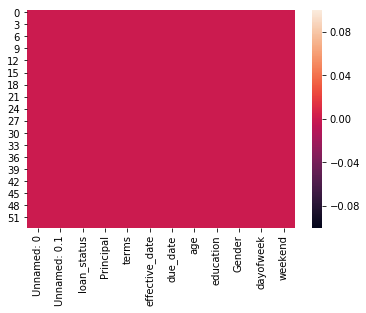

In [75]:
sns.heatmap(test_df.isnull())

In [76]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [77]:
dumm=pd.get_dummies(test_df['education'])
#dumm=dumm.drop('Master or Above',axis=1,inplace=True)
dumm=dumm[['Bechalor','High School or Below','college']]

In [78]:
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,dumm], axis=1)
#test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [81]:
test_data= test_feature
test_data= preprocessing.StandardScaler().fit(test_data).transform(test_data)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [80]:
y_t=test_df['loan_status']

In [82]:
## KNN

In [83]:
knn=KNeighborsClassifier()
knn.fit(X,y)
predKNN_test=knn.predict(test_data)
accuracy=metrics.accuracy_score(predKNN_test,y_t)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  74.1 %


In [84]:
score=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X,y)
    predKNN=knn.predict(test_data)
    accuracy=metrics.accuracy_score(predKNN,y_t)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.7037037037037037
2 :  0.5740740740740741
3 :  0.6481481481481481
4 :  0.6296296296296297
5 :  0.7407407407407407
6 :  0.6851851851851852
7 :  0.7222222222222222
8 :  0.7037037037037037
9 :  0.7037037037037037
10 :  0.6851851851851852
11 :  0.6851851851851852
12 :  0.6666666666666666
13 :  0.7037037037037037
14 :  0.7037037037037037
15 :  0.7222222222222222
16 :  0.7037037037037037
17 :  0.7222222222222222
18 :  0.7037037037037037
19 :  0.7222222222222222
20 :  0.7407407407407407
21 :  0.7592592592592593
22 :  0.7592592592592593
23 :  0.7592592592592593
24 :  0.7222222222222222
25 :  0.7407407407407407
26 :  0.7777777777777778
27 :  0.7592592592592593
28 :  0.7777777777777778
29 :  0.7592592592592593
30 :  0.7777777777777778
31 :  0.7407407407407407
32 :  0.7962962962962963
33 :  0.7777777777777778
34 :  0.7962962962962963
35 :  0.7962962962962963
36 :  0.7777777777777778
37 :  0.7962962962962963
38 :  0.7962962962962963
39 :  0.7962962962962963
40 :  0.7962962962962963
41 :  0.7

In [85]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')

32  :  79.63 %


In [86]:
knn=KNeighborsClassifier(n_neighbors=32)
knn.fit(X,y)
predKNN_test=knn.predict(test_data)
accuracy=metrics.accuracy_score(predKNN_test,y_t)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  79.60000000000001 %


In [87]:
print(classification_report(y_t,predKNN_test))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,predKNN_test)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,predKNN_test,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y,knn.predict(X))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.71      0.36      0.48        14
     PAIDOFF       0.81      0.95      0.87        40

   micro avg       0.80      0.80      0.80        54
   macro avg       0.76      0.65      0.67        54
weighted avg       0.78      0.80      0.77        54



Jaccard Similarity Score :  79.63 %


F1-SCORE :  [0.47619048 0.87356322]


Train Accuracy:  74.85549132947978 %


In [90]:
## SVM

In [91]:
svm=SVC().fit(X,y)
pred_svm=svm.predict(test_data)

In [92]:
print(classification_report(y_t,pred_svm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_svm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_svm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, svm.predict(X))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      0.97      0.84        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.37      0.49      0.42        54
weighted avg       0.55      0.72      0.62        54



Jaccard Similarity Score :  72.22 %


F1-SCORE :  [0.         0.83870968]


Train Accuracy:  76.01156069364163 %


In [93]:
## LOGISTIC REGRESSION

In [94]:
lgm=LogisticRegression().fit(X,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [95]:
pred_lgm=lgm.predict(test_data)

In [96]:
print(classification_report(y_t,pred_lgm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_lgm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_lgm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, lgm.predict(X))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.13        14
     PAIDOFF       0.75      1.00      0.86        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54



Jaccard Similarity Score :  75.93 %


F1-SCORE :  [0.13333333 0.86021505]


Train Accuracy:  75.43352601156069 %


In [100]:
Algoritm=['KNN','SVM','LogisticRegression']
j_knn=round(jaccard_similarity_score(y_t,predKNN_test)*100,2)
j_svm=round(jaccard_similarity_score(y_t,pred_svm)*100,2)
j_lgm=round(jaccard_similarity_score(y_t,pred_lgm)*100,2)
Jaccard=[j_knn,j_svm,j_lgm]

f1_knn=f1_score(y_t,predKNN_test,average=None)
f1_svm=f1_score(y_t,pred_svm,average=None)
f1_lgm=f1_score(y_t,pred_lgm,average=None)
F1_score=[f1_knn,f1_svm,f1_lgm]

In [102]:
table = pd.DataFrame({
    "Algorithm": Algoritm,
    "Jaccatd": Jaccard,
    "F1-Score": F1_score,
    "LogLoss":[np.NAN,np.NAN,np.NAN]})

In [103]:
table

,Algorithm,Jaccatd,F1-Score,LogLoss
0,KNN,79.63,"[0.4761904761904762, 0.8735632183908046]",NaN
1,SVM,72.22,"[0.0, 0.8387096774193549]",NaN
2,LogisticRegression,75.93,"[0.13333333333333333, 0.8602150537634409]",NaN
